In [2]:
from google.colab import files
uploaded = files.upload()

Saving student_data.csv to student_data.csv


Dataset Preview:
   StudentID  StudyHours  PreviousScores  FinalExamScore
0          1    8.777482              75              64
1          2    9.161915              55              82
2          3    3.278010              77              70
3          4    4.500247              60              60
4          5    2.264931              72              60

Model Evaluation:
Mean Absolute Error: 18.02982663257897
Mean Squared Error: 468.88511292976506
Root Mean Squared Error: 21.653755169248704


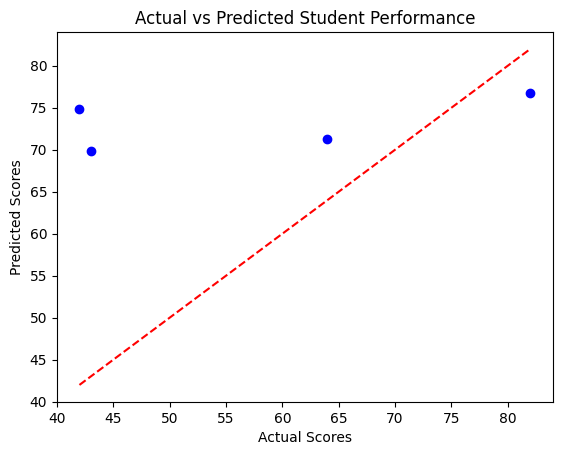

In [6]:
import pandas as pd  # Importing pandas for data handling
import numpy as np   # Importing numpy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
from sklearn.model_selection import train_test_split  # To split the dataset
from sklearn.linear_model import LinearRegression  # Importing Linear Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error  # For evaluating the model

# Step 1: Load the dataset (assuming it has already been uploaded)
filename = list(uploaded.keys())[0]  # Get the uploaded filename
df = pd.read_csv(filename)  # Read the dataset into a DataFrame
print("Dataset Preview:")
print(df.head())

# Step 2: Define independent (X) and dependent (y) variables
# Adjusting column names based on uploaded dataset
X = df[["StudyHours", "PreviousScores"]]  # Features
y = df["FinalExamScore"]  # Target variable

# Step 3: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Training the model

# Step 5: Predict on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print("\nModel Evaluation:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Step 7: Visualizing the predictions vs actual values
plt.scatter(y_test, y_pred, color='blue')  # Scatter plot for actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Student Performance")
plt.show()
